

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Exam version A
 
( 7th of November, 2019 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Please read the exercices carefully, write the necesary code and respond to all the questions. The code needs to be properly commented.


# Exercise 1  (2 points)

**(a) (2 points)** - Load the grayscale image `circles.bmp` stored in the `images` directory and visualize it. Convert it into a color image where the first circle should become red, the second - green and the third - blue, as it is shown below.
 
<img src="images/circles_rgb.bmp" width="200">

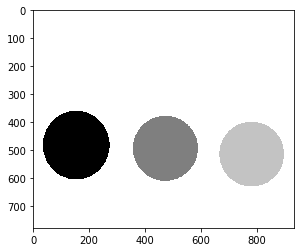

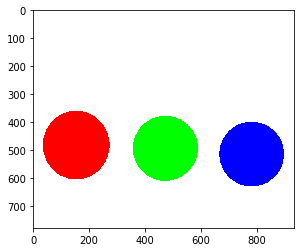

In [2]:
import numpy as np
from skimage import io, color, exposure
from matplotlib import pyplot as plt


circles = plt.imread('images/circles.bmp')
plt.imshow(circles)
plt.show()

circles_color=circles.copy()


red = circles_color[:, :, 0] == 0
circles_color[red]= [255,0,0]

green = circles_color[:, :, 0] == 127
circles_color[green]= [0,255,0]

blue = circles_color[:, :, 0] == 195
circles_color[blue]= [0,0,255]

plt.imshow(circles_color)
plt.show()

# Exercise 2  (4 points)
**(a) (4 points)** - Load the image collection stored in `images/bigbang/*.png`, and rescale to half of their size. It contains a video sequence with two persons who should be anonymized. Instead of blurrying the whole image, we want to define two static rectangular areas that are as small as possible. These two areas should be blurried, ensuring that both faces cannot be clearly seen.

The two rectangular areas should be determined manually. For this purpose, it is sufficient to display one image of the sequence using `imshow` and pay attention to the approximate pixel coordinates where the faces of the two persons fall.

Below there is an example of the expected result for a given frame:

<img src="images/bigbang_example.png" width="500">

# Exercise 3 (4 points)
**(a) (1 point)** Load the video in the folder `images/Barcelona-sequenceA`. Plot the first, middle and last frame in a 1x3 plot. Include titles in all images.

<img src="images/Barcelona-sequenceA/Barcelona-frame00104.png" width="200">

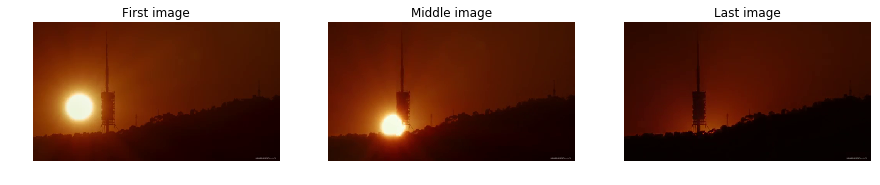

In [6]:
import numpy as np
import skimage
from skimage import io
import matplotlib.pyplot as plt

ic = io.ImageCollection('images/Barcelona-sequenceA/*.png')
        # Reading a sequence of images from a folder

first_image = ic[0]
middle_image = ic[int(len(ic)/2)]
last_image = ic[len(ic)-1]
    
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,15))
ax1.axis('off')
ax1.set_title('First image')
ax1.imshow(first_image)

ax2.axis('off')
ax2.set_title('Middle image')
ax2.imshow(middle_image)

ax3.axis('off')
ax3.set_title('Last image')
ax3.imshow(last_image)

plt.show()

**(b) (2 points)** Now, in a 1x3 plot, show the frame, background, foreground image for the middle frame.

46


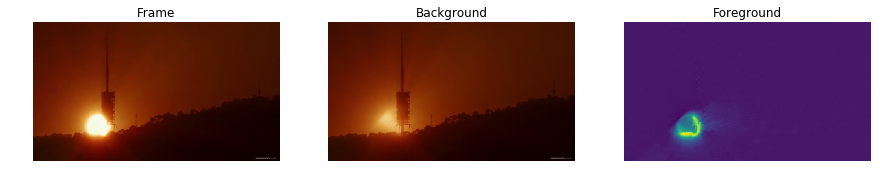

In [37]:
from skimage import img_as_float

background = np.zeros((360, 640, 3))

middle = int(len(ic)/2)
print(middle)

background[:, :, 0] = np.median(img_as_float(ic[0:len(ic)])[:, :, :, 0], axis=0)
background[:, :, 1] = np.median(img_as_float(ic[0:len(ic)])[:, :, :, 1], axis=0)
background[:, :, 2] = np.median(img_as_float(ic[0:len(ic)])[:, :, :, 2], axis=0)

fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,15))
ax1.axis('off')
ax1.set_title('Frame')
ax1.imshow(middle_image)

ax2.axis('off')
ax2.set_title('Background')
ax2.imshow(background)

ax3.axis('off')
ax3.set_title('Foreground')
ax3.imshow(color.rgb2gray(middle_image) - color.rgb2gray(background))

plt.show()

 **(c) (1 point)** Apply the SLIC segmentation method to the first 20 frames and calculate the number of segments per frame. Provide the frame number of the frame with the highest number of segments and plot it. 

<img src="images/final_result.png" width="500">

C:\ProgramData\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:156: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_z = grid_z[slices]
C:\ProgramData\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:157: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  segments_y = grid_y[slices]
C:\ProgramData\Anaconda3\lib\site-packages\skimage\segmentation\slic_superpixels.py:158: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]

Frame 1 has  79  segments.
Frame  2  has  78  segments.
Frame  3  has  79  segments.
Frame  4  has  79  segments.
Frame  5  has  82  segments.
Frame  6  has  79  segments.
Frame  7  has  83  segments.
Frame  8  has  82  segments.
Frame  9  has  82  segments.
Frame  10  has  80  segments.
Frame  11  has  82  segments.
Frame  12  has  82  segments.
Frame  13  has  82  segments.
Frame  14  has  80  segments.
Frame  15  has  77  segments.
Frame  16  has  79  segments.
Frame  17  has  79  segments.
Frame  18  has  80  segments.
Frame  19  has  83  segments.
Frame  20  has  83  segments.
The frame that has more segmets is the number  20


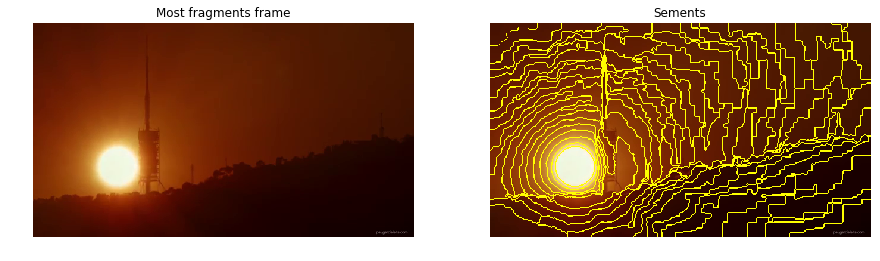

In [52]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries



segments_slic_initial = slic(ic[0], compactness=0.1,sigma=1)
print("Frame 1 has ", len(np.unique(segments_slic_initial)), " segments.")
maxim, numero = len(np.unique(segments_slic_initial)), 0
i=2
while i<=20:
    segments_slic = slic(ic[i], compactness=0.1,sigma=1)
    print("Frame ", i," has ", len(np.unique(segments_slic)), " segments.")
    if len(np.unique(segments_slic))>maxim:
        maxim, numero = len(np.unique(segments_slic_initial)), i
    i+=1

print("The frame that has more segmets is the number ", numero)
segments_slic_bo = slic(ic[numero], compactness=0.1,sigma=1)


fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,15))
ax1.axis('off')
ax1.set_title('Most fragments frame')
ax1.imshow(ic[numero])

ax2.axis('off')
ax2.set_title('Sements')
ax2.imshow(mark_boundaries(ic[numero], segments_slic_bo)) 

plt.show()